In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("water.xlsx")

In [3]:
df = df.loc[df["location"] == "Cure", ["date", "volume"]]

In [4]:
df = df.append(pd.DataFrame([{"date": pd.Timestamp("2021-09-10"), "volume": 2330.74}]))

In [5]:
df = df.set_index("date")

In [6]:
df = df.resample("1D").interpolate()

<AxesSubplot:xlabel='date'>

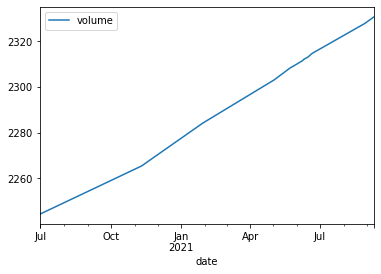

In [7]:
df.plot()

In [8]:
df["volume"] = df["volume"] - (2331.7053 - 1.323)

In [9]:
df = df.iloc[:-1,:]

In [10]:
df

,volume
date,
2020-06-30,-86.052300
2020-07-01,-85.893578
2020-07-02,-85.734856
2020-07-03,-85.576135
2020-07-04,-85.417413
...,...
2021-09-05,-0.824443
2021-09-06,-0.588014
2021-09-07,-0.351586


<AxesSubplot:ylabel='Density'>

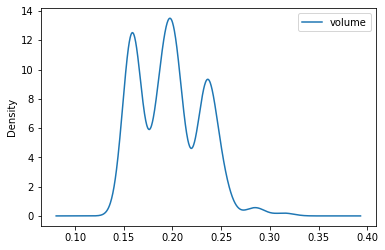

In [12]:
df.diff().plot(kind="kde")

In [16]:
df["time"] = df.index.map(lambda x: int(x.timestamp()))*1000000000

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
df

,volume,time
date,,
2020-06-30,-86.052300,1593475200000000000
2020-07-01,-85.893578,1593561600000000000
2020-07-02,-85.734856,1593648000000000000
2020-07-03,-85.576135,1593734400000000000
2020-07-04,-85.417413,1593820800000000000
...,...,...
2021-09-05,-0.824443,1630800000000000000
2021-09-06,-0.588014,1630886400000000000
2021-09-07,-0.351586,1630972800000000000


In [18]:
for r in df.to_dict(orient="records"):
    print("INSERT device_frmpayload_data_index,application_name=home-water,dev_eui=04b6481955196490,device_name=water-meter-01,f_port=1 value={volume:} {time:}".format(**r))

INSERT device_frmpayload_data_index,application_name=home-water,dev_eui=04b6481955196490,device_name=water-meter-01,f_port=1 value=-86.05230000000029 1593475200000000000
INSERT device_frmpayload_data_index,application_name=home-water,dev_eui=04b6481955196490,device_name=water-meter-01,f_port=1 value=-85.89357819548923 1593561600000000000
INSERT device_frmpayload_data_index,application_name=home-water,dev_eui=04b6481955196490,device_name=water-meter-01,f_port=1 value=-85.73485639097771 1593648000000000000
INSERT device_frmpayload_data_index,application_name=home-water,dev_eui=04b6481955196490,device_name=water-meter-01,f_port=1 value=-85.57613458646665 1593734400000000000
INSERT device_frmpayload_data_index,application_name=home-water,dev_eui=04b6481955196490,device_name=water-meter-01,f_port=1 value=-85.41741278195514 1593820800000000000
INSERT device_frmpayload_data_index,application_name=home-water,dev_eui=04b6481955196490,device_name=water-meter-01,f_port=1 value=-85.25869097744408 